In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_features=5, noise=15, bias=10, random_state=1)

In [7]:
class CustomLinearReg:
    
    def __init__(self, lr=.01, iters=30):
        self.lr = lr
        self.iters = iters
        
    def fit(self, X, y):
        
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        
        self.theta_ = np.random.randn(X.shape[1], 1)
        
        errors = []
        
        for i in range(self.iters):
            selected = np.random.randint(0, X.shape[0], X.shape[0]//10)
            error = self.gradient_decent(X[selected], y[selected])
            errors.append(error)
            
        return errors
            
    def gradient_decent(self, X, y):
        delta_theta, error = self.gradient(X, y)
        self.theta_ += delta_theta
        return error
        
    def gradient(self, X, y):
        ya =  y.reshape(-1, 1)
        yh = self.hypo(X)
        
        dmsedt = np.dot(X.T, (yh-ya)) / X.shape[0]
        
        delta_theta = -dmsedt * self.lr
        error = np.sum((yh-ya) ** 2) / X.shape[0]
        
        return delta_theta, error
        
        
    def hypo(self, X):
        return np.dot(X, self.theta_)
    
    def predict(self, X):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        
        result = self.hypo(X)
        
        return result.flatten()
        
        
        

In [12]:
model = CustomLinearReg(lr=.1, iters=1000)

In [13]:
errors = model.fit(X, y)

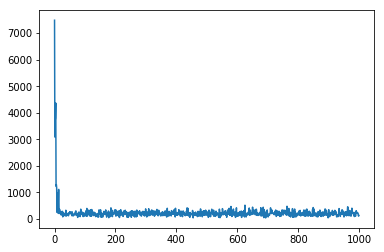

In [14]:
plt.plot(errors)

In [11]:
yh = model.predict(X)

In [18]:
yh[:10]

array([  40.68561697,   94.17131757,  119.20127354,  -38.22950863,
       -263.55048217,   15.68705472,   63.62515522,   53.69090877,
        -16.54298147,   37.13859349])

In [19]:
y[:10]

array([  43.5171099 ,   57.65141943,  123.08271761,  -43.37373343,
       -247.57689921,    8.53711187,   41.42818339,   51.97005873,
        -20.65603669,   57.77285488])